<a href="https://colab.research.google.com/github/Zardian18/Disaster-Not_disaster-tweet/blob/master/08_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py

from helper import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2023-12-21 09:44:37--  https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11274 (11K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  11.01K  --.-KB/s    in 0s      

2023-12-21 09:44:37 (98.3 MB/s) - ‘helper.py’ saved [11274/11274]



## Get a Text Dataset

We will be using Kaggle's introduction to NLP dataset
* Tweets classified as disaster or non disaster

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

unzip_data("nlp_getting_started.zip")

--2023-12-21 09:44:41--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.132.207, 74.125.201.207, 74.125.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.132.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2023-12-21 09:44:41 (102 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing the text dataset

In [3]:
import pandas as pd

train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
train_df_shuffled= train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
import random

randnum= random.randint(0, len(train_df)-1)
for row in train_df_shuffled[["text", "target"]][randnum: randnum+5].itertuples():
  _, text, target= row
  print(f"Target: {target}", "(real disaster)" if target>0 else "(not real disaster)")
  print(f"Text: \n{text}\n")
  print("-----\n")


Target: 1 (real disaster)
Text: 
Literally trapped in my room Cuz my bathroom being remodeled. The only exit is through a window

-----

Target: 1 (real disaster)
Text: 
@NBCNews Yea bombing #pearlharbor not so good of an idea!

-----

Target: 1 (real disaster)
Text: 
Ebola: Alabama Home Quarantined Over Possible Ebola Case.. Related Articles: http://t.co/BiigD1LEq3

-----

Target: 0 (not real disaster)
Text: 
'Without an ally near you can't use this skill.' How did you get hired? Really cause it's making every Riot staff member look incompetent.

-----

Target: 0 (not real disaster)
Text: 
The tragedy of life is not that it ends so soon but that we wait so long to begin it. ~ W.M. Lewis #quotes

-----



## Splitting into validation dataset

In [9]:
from sklearn.model_selection import train_test_split
train_sentenced, val_sentences, train_labels, val_labels= train_test_split(train_df_shuffled["text"].to_numpy(), train_df_shuffled["target"].to_numpy(), test_size=0.1,
                                                                           random_state=42)



In [10]:
len(train_sentenced), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

In [11]:
train_sentenced[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Convert Text into numbers

* One way to do this is assigning every token (word) a unique number
* Another way is to one hot encode them in a similar manner
* Creating an embedding

### Text vectorization (tokenization)

In [12]:
train_sentenced[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [14]:
text_vecotrizer= TextVectorization(max_tokens=10000,
                                   standardize="lower_and_strip_punctuation",
                                   split="whitespace",
                                   ngrams=None,
                                   output_mode="int",
                                   output_sequence_length=None,
                                   pad_to_max_tokens=True)

In [15]:
# average tokens in each tweet
round(sum([len(i.split()) for i in train_sentenced])/ len(train_sentenced))

15

In [16]:
max_vocab_length= 10000
max_length= 15 # length of a tweet


text_vectorizer= TextVectorization(max_tokens= max_vocab_length,
                                   output_mode="int",
                                   output_sequence_length=max_length)

In [17]:
# now adapting to out train_sentences

text_vectorizer.adapt(train_sentenced)

In [18]:
# now testing it

sample_sentence="Fire in the mountain, RUN RUN RUN"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  42,    4,    2, 1118,  340,  340,  340,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [19]:
# random sentence from train_sentence
random_sentence= random.choice(train_sentenced)
print(f"Original Text: {random_sentence}")
text_vectorizer([random_sentence])

Original Text: @VinusTrip Did you see #hurricane #guillermo with #MeteoEarth? http://t.co/mfckpVzfV8


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[7016,  145,   12,   99,  346, 2439,   14, 5134, 5434,    0,    0,
           0,    0,    0,    0]])>

In [20]:
# getting the unique words in the vocabulary
words_in_voc= text_vectorizer.get_vocabulary()
words_in_voc[:5]

['', '[UNK]', 'the', 'a', 'in']

In [21]:
words_in_voc[-5:]

['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']

### Create an embedding

In [22]:
from tensorflow.keras import layers

embedding= layers.Embedding(input_dim= max_vocab_length,
                            output_dim= 128,
                            input_length=max_length)

In [23]:
embedding

In [24]:
random_sentence= random.choice(train_sentenced)
print(f"Original Text: {random_sentence}")
sample_embed= embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text: Newlyweds feed thousands of Syrian refugees instead of hosting a banquet wedding dinner -  http://t.co/XZV0lT9ZZk via @smh


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.00235492, -0.04245677, -0.03878545, ..., -0.00879371,
         -0.02508159, -0.01437445],
        [-0.04025846, -0.01091401,  0.02443028, ...,  0.03881076,
         -0.0125069 , -0.00775452],
        [-0.01881076, -0.02111076, -0.04359322, ...,  0.03709295,
          0.00841498, -0.03109411],
        ...,
        [-0.0474088 ,  0.00645446, -0.03310529, ..., -0.02717711,
         -0.04237583, -0.01152007],
        [ 0.04635851,  0.03817612, -0.02256002, ..., -0.04123542,
         -0.00272976, -0.02983813],
        [-0.04942974,  0.02890297, -0.0465034 , ..., -0.00956297,
          0.02180061,  0.02878164]]], dtype=float32)>

In [25]:
tf.math.reduce_min(sample_embed).numpy(), tf.math.reduce_max(sample_embed).numpy()

(-0.049820054, 0.049970936)

In [26]:
sample_embed[0][0] # the first word

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 0.00235492, -0.04245677, -0.03878545,  0.02748902, -0.03242648,
        0.01714091, -0.0199677 , -0.04782635,  0.03113231,  0.0414194 ,
       -0.03504967, -0.03039119,  0.0064219 , -0.00899527, -0.02317851,
        0.02043823, -0.04071863,  0.02601423,  0.03124304,  0.02003075,
        0.01793878, -0.02292198,  0.04383403, -0.01487371, -0.00222371,
        0.02210169,  0.04413513, -0.04303085, -0.01883465,  0.02497624,
       -0.03204064, -0.0167849 , -0.0037573 ,  0.04114885,  0.04522559,
        0.03624988, -0.00315584, -0.03029329, -0.01895366, -0.04584357,
       -0.03078347,  0.02891808, -0.01447045,  0.00586479, -0.04636992,
       -0.01912336, -0.01623492, -0.03818844, -0.00301187, -0.04214848,
        0.01260361, -0.02098693,  0.03070498,  0.0070809 ,  0.01199142,
        0.04499075, -0.01327557, -0.02012242, -0.0289886 ,  0.02628125,
       -0.00282588, -0.00144685, -0.03523434, -0.00184344, -0.01173438,
       -0.018613

## Modeling

Experiments:

* Model 0: Baseline model, Naive bayes
* Model 1: Feed- Forward neural network (dense model)
* Model 2: LSTM (RNN)
* Model 3: GRU (RNN)
* Model 4: Bidirectional LSTM (RNN)
* Model 5: 1D CNN
* Model 6: Tensorflow hub pretrained feature extractor
* Model 7: same woth 10% data

### Model 0

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

model0= Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model0.fit(train_sentenced, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
base_score= model0.score(val_sentences, val_labels)

In [29]:
base_score

0.7926509186351706

In [30]:
base_preds= model0.predict(val_sentences)
base_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [31]:
# evaluation function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def Evaluate_model(y_test, y_preds):

  accuracy=accuracy_score(y_test, y_preds)
  precision=precision_score(y_test, y_preds)
  recall= recall_score(y_test, y_preds)
  f1= f1_score(y_test, y_preds)

  scores={}
  scores['accuracy']=accuracy
  scores['precision']=precision
  scores['recall']=recall
  scores['f1']=f1

  return scores

In [32]:
baseline_scores=Evaluate_model(val_labels, base_preds)

In [33]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model 1

In [34]:
from helper import create_tensorboard_callback

SAVE_DIR="model_logs"

In [35]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
x= tf.keras.layers.GlobalAveragePooling1D(name="globalAvgPool")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model1= tf.keras.Model(inputs, outputs, name="dense_model")

In [36]:
model1.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 globalAvgPool (GlobalAvera  (None, 128)               0         
 gePooling1D)                                                    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 12801

In [37]:
model1.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])


In [38]:
history1= model1.fit(x=train_sentenced,
                     y=train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR, experiment_name="model1")])

Saving TensorBoard log files to: model_logs/model1/20231221-094443
Epoch 1/5
215/215 [==============================] - 3s 11ms/step - loss: 0.6124 - accuracy: 0.6941 - val_loss: 0.5360 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4420 - accuracy: 0.8178 - val_loss: 0.4699 - val_accuracy: 0.7874
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3467 - accuracy: 0.8596 - val_loss: 0.4586 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.2837 - accuracy: 0.8889 - val_loss: 0.4616 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2372 - accuracy: 0.9123 - val_loss: 0.4855 - val_accuracy: 0.7900


In [39]:
model1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.7900


[0.4855138063430786, 0.7900262475013733]

In [40]:
model1_preds= model1.predict(val_sentences)

# model1_results= Evaluate_model(val_labels, model1_preds)
# model1_results

24/24 [==============================] - 0s 2ms/step


In [41]:
model1_preds[0]

array([0.27682647], dtype=float32)

In [42]:
model1_preds.shape

(762, 1)

In [43]:
model1_preds= tf.squeeze(tf.round(model1_preds))

model1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [44]:
model1_results= Evaluate_model(val_labels, model1_preds)
model1_results

{'accuracy': 0.7900262467191601,
 'precision': 0.8455882352941176,
 'recall': 0.6609195402298851,
 'f1': 0.7419354838709676}

In [45]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

#### Testing custom Sentences

In [46]:
# testing custom sentences

def Test_custom_sentence(sentence, model):
  pred= model.predict(sentence)
  print(f"pred: {pred}")
  sol="Disaster"
  if pred<0.5:
    sol= "No Disaster"
  print(f"Sentence: {sentence}\n")
  print(f"Prediction: {sol}")

In [47]:
Test_custom_sentence(sentence=["Tornadoes destroys a village"], model=model1)

1/1 [==============================] - 0s 35ms/step
pred: [[0.8351067]]
Sentence: ['Tornadoes destroys a village']

Prediction: Disaster


#### Viewing the embedding

In [48]:
words_in_vocab= text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [49]:
model1.summary()

Model: "dense_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 globalAvgPool (GlobalAvera  (None, 128)               0         
 gePooling1D)                                                    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 12801

In [50]:
embed_weights= model1.get_layer("embedding").get_weights()
embed_weights

[array([[-0.01527777, -0.02279267,  0.01630914, ..., -0.01831863,
          0.03351837, -0.02892664],
        [ 0.05920178,  0.02530669, -0.00955783, ..., -0.03277024,
          0.01075645, -0.04197535],
        [-0.01504464, -0.05601275, -0.01143509, ...,  0.02296007,
         -0.02984348,  0.00510066],
        ...,
        [-0.03454689,  0.03320065,  0.0171733 , ...,  0.01384448,
          0.02422002,  0.02318176],
        [ 0.01257119, -0.0418679 ,  0.0274762 , ...,  0.03910856,
          0.00859898,  0.00163666],
        [ 0.05274266, -0.03282506,  0.01369173, ...,  0.10189236,
          0.08128005, -0.01981237]], dtype=float32)]

In [51]:
embed_weights[0].shape

(10000, 128)

In [52]:
import io

# Create output writers
out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# Write embedding vectors and words to file
for num, word in enumerate(words_in_vocab):
  if num == 0:
     continue # skip padding token

  vec = embed_weights[0][num]
  out_m.write(word + "\n") # write words to file
  out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
out_v.close()
out_m.close()


In [53]:
# Download files locally to upload to Embedding Projector
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download("embedding_vectors.tsv")
  files.download("embedding_metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recurrent Neural networks

Useful for sequence data

### Model 2 : LSTM

In [54]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
# x= tf.keras.layers.GlobalAveragePooling1D()(x)
# x= tf.keras.layers.LSTM(units=64, return_sequences=True)(x)

# need to return sequneces=true for LSTM layers to stack

x= tf.keras.layers.LSTM(64)(x)
# x= tf.keras.layers.Dense(64, activation="relu")
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model2= tf.keras.Model(inputs, outputs, name="model2")

In [55]:
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [56]:
model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])


In [57]:
history2= model2.fit(train_sentenced,
                     train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=[create_tensorboard_callback(SAVE_DIR, "model2")])

Saving TensorBoard log files to: model_logs/model2/20231221-094501
Epoch 1/5
215/215 [==============================] - 9s 27ms/step - loss: 0.2244 - accuracy: 0.9149 - val_loss: 0.5565 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1552 - accuracy: 0.9422 - val_loss: 0.6337 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.1296 - accuracy: 0.9534 - val_loss: 0.7363 - val_accuracy: 0.7861
Epoch 4/5
215/215 [==============================] - 4s 18ms/step - loss: 0.1040 - accuracy: 0.9593 - val_loss: 0.7637 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0895 - accuracy: 0.9654 - val_loss: 0.9466 - val_accuracy: 0.7730


In [58]:
model2_preds= model2.predict(val_sentences)
model2_preds[:5]

24/24 [==============================] - 0s 3ms/step


array([[3.0270650e-03],
       [8.5264677e-01],
       [9.9978590e-01],
       [1.4913220e-02],
       [5.2396022e-04]], dtype=float32)

In [59]:
model2_preds.shape

(762, 1)

In [60]:
model2_preds= tf.squeeze(tf.round(model2_preds))

model2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [61]:
model2_results=Evaluate_model(val_labels, model2_preds)

In [62]:
model2_results

{'accuracy': 0.7729658792650919,
 'precision': 0.8205128205128205,
 'recall': 0.6436781609195402,
 'f1': 0.7214170692431562}

In [63]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

#### Model2a: more layers

In [64]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
x= tf.keras.layers.LSTM(64, return_sequences=True)(x)
x= tf.keras.layers.LSTM(64)(x)
x= tf.keras.layers.Dense(64)(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model2a= tf.keras.Model(inputs, outputs, name="model2a")

In [65]:
model2a.summary()

Model: "model2a"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                           

In [66]:
model2a.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

In [67]:
history2a= model2a.fit(train_sentenced,
                       train_labels,
                       epochs=5,
                       validation_data=(val_sentences, val_labels),
                       callbacks=[create_tensorboard_callback(SAVE_DIR, "model2a")])

Saving TensorBoard log files to: model_logs/model2a/20231221-094525
Epoch 1/5
215/215 [==============================] - 8s 26ms/step - loss: 0.1303 - accuracy: 0.9580 - val_loss: 1.0220 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0760 - accuracy: 0.9699 - val_loss: 1.3098 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.0598 - accuracy: 0.9736 - val_loss: 1.6580 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0522 - accuracy: 0.9749 - val_loss: 1.4634 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0498 - accuracy: 0.9775 - val_loss: 1.6551 - val_accuracy: 0.7756


### Model 3: GRU

In [68]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
x= tf.keras.layers.GRU(64)(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model3= tf.keras.Model(inputs, outputs)

In [69]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (5.03 MB)
Non-trainable params: 0 (0.00 Byte)
_______________________

In [70]:
model3.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [71]:
history3= model3.fit(train_sentenced,
                     train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=[create_tensorboard_callback(SAVE_DIR, "model3")])

Saving TensorBoard log files to: model_logs/model3/20231221-094552
Epoch 1/5
215/215 [==============================] - 6s 18ms/step - loss: 0.1414 - accuracy: 0.9435 - val_loss: 0.9068 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0745 - accuracy: 0.9714 - val_loss: 0.8126 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 4s 18ms/step - loss: 0.0546 - accuracy: 0.9774 - val_loss: 1.0209 - val_accuracy: 0.7690
Epoch 4/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0452 - accuracy: 0.9788 - val_loss: 1.0761 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.0424 - accuracy: 0.9796 - val_loss: 1.4212 - val_accuracy: 0.7769


In [72]:
model3_preds= model3.predict(val_sentences)

model3_preds[:5]

24/24 [==============================] - 0s 3ms/step


array([[4.8421518e-04],
       [8.9829826e-01],
       [9.9992609e-01],
       [1.2020009e-01],
       [6.2711042e-05]], dtype=float32)

In [73]:
model3_preds= tf.squeeze(tf.round(model3_preds))
model3_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [74]:
model3_results=Evaluate_model(val_labels, model3_preds)

In [75]:
model3_results

{'accuracy': 0.7769028871391076,
 'precision': 0.7763975155279503,
 'recall': 0.7183908045977011,
 'f1': 0.7462686567164178}

In [76]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model 4: Birdirectional

In [77]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x=embedding(x)
x=tf.keras.layers.Bidirectional(layer=tf.keras.layers.LSTM(64))(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model4= tf.keras.Model(inputs, outputs)

In [78]:
model4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable params: 1378945 (

In [79]:
model4.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

In [80]:
history4= model4.fit(train_sentenced,
                     train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=[create_tensorboard_callback(SAVE_DIR, "model4")])

Saving TensorBoard log files to: model_logs/model4/20231221-094616
Epoch 1/5
215/215 [==============================] - 8s 25ms/step - loss: 0.0958 - accuracy: 0.9704 - val_loss: 1.1111 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0464 - accuracy: 0.9785 - val_loss: 1.1901 - val_accuracy: 0.7664
Epoch 3/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0413 - accuracy: 0.9800 - val_loss: 1.2508 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 6s 26ms/step - loss: 0.0374 - accuracy: 0.9818 - val_loss: 1.4077 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0349 - accuracy: 0.9825 - val_loss: 1.5825 - val_accuracy: 0.7717


In [81]:
model4_preds= model4.predict(val_sentences)
model4_preds[:5]

24/24 [==============================] - 1s 4ms/step


array([[8.7065483e-04],
       [9.2160225e-01],
       [9.9998546e-01],
       [2.2106872e-01],
       [8.0886130e-06]], dtype=float32)

In [82]:
model4_preds= tf.squeeze(tf.round(model4_preds))
model4_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [83]:
model4_results= Evaluate_model(val_labels, model4_preds)

In [84]:
model4_results

{'accuracy': 0.7716535433070866,
 'precision': 0.7880794701986755,
 'recall': 0.6839080459770115,
 'f1': 0.7323076923076923}

In [85]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

In [86]:
Test_custom_sentence(["I like swimming in summer season"], model4)

1/1 [==============================] - 0s 26ms/step
pred: [[0.2510988]]
Sentence: ['I like swimming in summer season']

Prediction: No Disaster


In [87]:
model2_results

{'accuracy': 0.7729658792650919,
 'precision': 0.8205128205128205,
 'recall': 0.6436781609195402,
 'f1': 0.7214170692431562}

In [88]:
model3_results

{'accuracy': 0.7769028871391076,
 'precision': 0.7763975155279503,
 'recall': 0.7183908045977011,
 'f1': 0.7462686567164178}

In [89]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

#### Model 4a : combination of others

In [90]:
inputs= tf.keras.layers.Input(shape=(1,), dtype=tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
print(x.shape)
x= tf.keras.layers.GRU(64, return_sequences=True)(x)
x= tf.keras.layers.GRU(128)(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model4a= tf.keras.Model(inputs, outputs)

(None, 15, 128)


In [91]:
model4a.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru_1 (GRU)                 (None, 15, 64)            37248     
                                                                 
 gru_2 (GRU)                 (None, 128)               74496     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                           

In [92]:
model4a.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

In [93]:
history4a= model4a.fit(train_sentenced,
            train_labels,
            epochs=5,
            validation_data=(val_sentences, val_labels),
            callbacks=create_tensorboard_callback(SAVE_DIR, "model4a"))

Saving TensorBoard log files to: model_logs/model4a/20231221-094646
Epoch 1/5
215/215 [==============================] - 10s 29ms/step - loss: 0.2543 - accuracy: 0.9013 - val_loss: 0.5244 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1619 - accuracy: 0.9384 - val_loss: 0.7700 - val_accuracy: 0.7612
Epoch 3/5
215/215 [==============================] - 6s 26ms/step - loss: 0.1183 - accuracy: 0.9534 - val_loss: 0.8431 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0998 - accuracy: 0.9597 - val_loss: 0.9894 - val_accuracy: 0.7375
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0892 - accuracy: 0.9622 - val_loss: 1.1930 - val_accuracy: 0.7598


In [94]:
model4a_preds= model4a.predict(val_sentences)

model4a_preds= tf.squeeze(tf.round(model4a_preds))
model4_preds[:5]

24/24 [==============================] - 1s 5ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [95]:
model4a_results= Evaluate_model(val_labels, model4a_preds)

In [96]:
model4a_results

{'accuracy': 0.7598425196850394,
 'precision': 0.7635782747603834,
 'recall': 0.6867816091954023,
 'f1': 0.7231467473524964}

In [97]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model 5: Conv-1D

In [98]:
from tensorflow.keras import layers

embedding_test= embedding(text_vectorizer(["this is a test sentence"]))
conv_1d= layers.Conv1D(filters=32,
                       kernel_size= 5,
                       activation="relu",
                       padding="valid")

conv_1d_output= conv_1d(embedding_test)
max_pool= layers.GlobalMaxPool1D()
max_pool_output= max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [99]:
inputs= layers.Input(shape=(1,), dtype= tf.string)
x= text_vectorizer(inputs)
x= embedding(x)
print(x.shape)
x= layers.Conv1D(filters=64, kernel_size=5, activation="relu")(x)
x= layers.GlobalMaxPool1D()(x)
outputs= layers.Dense(1, activation="sigmoid")(x)

model5= tf.keras.Model(inputs, outputs)


# compile

model5.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

model5.summary()

(None, 15, 128)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_7 (Dense)             (None, 1)     

In [100]:
# fit

history5= model5.fit(train_sentenced,
                     train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=create_tensorboard_callback(SAVE_DIR, "model5"))

Saving TensorBoard log files to: model_logs/model5/20231221-094731
Epoch 1/5
215/215 [==============================] - 3s 12ms/step - loss: 0.1249 - accuracy: 0.9569 - val_loss: 0.9180 - val_accuracy: 0.7612
Epoch 2/5
215/215 [==============================] - 3s 13ms/step - loss: 0.0783 - accuracy: 0.9707 - val_loss: 1.0300 - val_accuracy: 0.7585
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0605 - accuracy: 0.9758 - val_loss: 1.2159 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0494 - accuracy: 0.9804 - val_loss: 1.2488 - val_accuracy: 0.7507
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0454 - accuracy: 0.9800 - val_loss: 1.3871 - val_accuracy: 0.7467


In [101]:
model5_preds= model5.predict(val_sentences)

model5_preds=tf.squeeze(tf.round(model5_preds))
model5_preds[:5]

24/24 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 0.], dtype=float32)>

In [102]:
model5_results= Evaluate_model(val_labels, model5_preds)

In [103]:
model5_results

{'accuracy': 0.7467191601049868,
 'precision': 0.739938080495356,
 'recall': 0.6867816091954023,
 'f1': 0.7123695976154993}

In [104]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

### Model 6: Transfer Learning

In [111]:
import tensorflow_hub as hub

model_url = "https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2"
embed= hub.load(model_url)
embed_samples= embed([sample_sentence, "Universal Sentence Encoder"])

print(embed_samples[0][:50])

tf.Tensor(
[-1.5951728e-02 -3.4223765e-03 -4.5679999e-03  3.8159635e-02
  5.0240614e-02  2.9245324e-03  8.0683544e-02  2.2725204e-02
 -8.9457557e-05  4.9266536e-02  7.8144617e-02 -1.1974493e-02
 -8.9616729e-03 -5.8338321e-03 -2.0111152e-03 -6.3726731e-02
  5.3094760e-02 -2.1646885e-02  4.2870943e-02  6.2195804e-02
 -6.7710444e-02 -2.3051651e-02 -6.9819301e-02 -2.3633568e-02
  7.0967125e-03  2.4231002e-02 -1.5384833e-02  3.9172530e-02
 -8.9556888e-02  1.5796386e-02  3.1285621e-02 -3.2831490e-02
 -7.2770707e-02 -8.6101727e-04 -2.5919201e-03 -3.3657306e-03
  3.1356923e-02 -1.5673870e-02  3.2721303e-02  7.1010299e-02
 -6.3223258e-02  2.4449687e-02 -5.1161315e-02 -6.2807985e-02
 -9.5512226e-02  4.8906531e-02 -2.0266201e-02 -7.8284144e-02
  3.2159276e-02 -5.1895447e-02], shape=(50,), dtype=float32)


In [112]:
embed_samples.shape

TensorShape([2, 512])

In [113]:
embed

<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x7e20098a7d30>

In [114]:
embedding

In [117]:
sentence_encoder_layer= hub.KerasLayer(model_url,
                                       input_shape=[],
                                       dtype=tf.string,
                                       name="Sentence_Encoder")

In [ ]:
# inputs= layers.Input(shape=(1,), dtype=tf.string)
# x= sentence_encoder_layer(inputs)
# x= layers.Dense(64, activation="relu")(x)
# outputs= layers.Dense(1, activation="sigmoid")(x)

# model6= tf.keras.Model(inputs, outputs)


In [119]:
model6= tf.keras.Sequential()
model6.add(sentence_encoder_layer)
model6.add(layers.Dense(1, activation="sigmoid"))
# model6.name="Feature_extraction_model6"

model6.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

model6.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Sentence_Encoder (KerasLay  (None, 512)               256797824 
 er)                                                             
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 256798337 (979.61 MB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [120]:
history6= model6.fit(train_sentenced,
                     train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=[create_tensorboard_callback(SAVE_DIR, "model6")])

Saving TensorBoard log files to: model_logs/model6/20231221-103131
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.6487 - accuracy: 0.7357 - val_loss: 0.6126 - val_accuracy: 0.7703
Epoch 2/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5805 - accuracy: 0.7892 - val_loss: 0.5626 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5375 - accuracy: 0.7975 - val_loss: 0.5306 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.5087 - accuracy: 0.7975 - val_loss: 0.5095 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 7ms/step - loss: 0.4888 - accuracy: 0.8011 - val_loss: 0.4953 - val_accuracy: 0.7887


In [121]:
model6_preds= model6.predict(val_sentences)

24/24 [==============================] - 1s 14ms/step


In [122]:
model6_preds= tf.squeeze(tf.round(model6_preds))
model6_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [123]:
model6_results= Evaluate_model(val_labels, model6_preds)
model6_results

{'accuracy': 0.7887139107611548,
 'precision': 0.7987220447284346,
 'recall': 0.7183908045977011,
 'f1': 0.75642965204236}

In [124]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

#### Model 6a: improving

In [126]:
model6a= tf.keras.Sequential()
model6a.add(sentence_encoder_layer)
model6a.add(layers.Dense(64, activation="relu"))
model6a.add(layers.Dense(128, activation="relu"))
model6a.add(layers.Dense(1, activation="sigmoid"))
# model6.name="Feature_extraction_model6"

model6a.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

model6a.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Sentence_Encoder (KerasLay  (None, 512)               256797824 
 er)                                                             
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256839105 (979.76 MB)
Trainable params: 41281 (161.25 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [127]:
history6a= model6a.fit(train_sentenced,
                     train_labels,
                     epochs=5,
                     validation_data=(val_sentences, val_labels),
                     callbacks=[create_tensorboard_callback(SAVE_DIR, "model6a")])

Saving TensorBoard log files to: model_logs/model6a/20231221-103552
Epoch 1/5
215/215 [==============================] - 4s 10ms/step - loss: 0.4781 - accuracy: 0.7767 - val_loss: 0.4382 - val_accuracy: 0.8058
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3983 - accuracy: 0.8247 - val_loss: 0.4151 - val_accuracy: 0.8150
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3757 - accuracy: 0.8351 - val_loss: 0.4161 - val_accuracy: 0.8163
Epoch 4/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3543 - accuracy: 0.8482 - val_loss: 0.4193 - val_accuracy: 0.8189
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3269 - accuracy: 0.8641 - val_loss: 0.4267 - val_accuracy: 0.8123


In [128]:
model6a_preds= model6a.predict(val_sentences)
model6a_preds= tf.squeeze(tf.round(model6a_preds))
model6a_preds[:5]
model6a_results= Evaluate_model(val_labels, model6a_preds)
model6a_results

24/24 [==============================] - 1s 12ms/step


{'accuracy': 0.8123359580052494,
 'precision': 0.8700361010830325,
 'recall': 0.6925287356321839,
 'f1': 0.7712000000000001}

In [129]:
baseline_scores

{'accuracy': 0.7926509186351706,
 'precision': 0.8861788617886179,
 'recall': 0.6264367816091954,
 'f1': 0.734006734006734}

In [157]:
Test_custom_sentence(["Fire in the mountain RUN RUN RUN"], model6a)

1/1 [==============================] - 0s 27ms/step
pred: [[0.6125752]]
Sentence: ['Fire in the mountain RUN RUN RUN']

Prediction: Disaster


### Model 7: only on 10% of data

In [211]:
# train10_percent= train_df_shuffled[["text", 'target']].sample(frac=0.1, random_state=42)
num_10_perc= int(0.1*len(train_sentenced))
train10_sentences= train_sentenced[:num_10_perc]

train10_labels= train_labels[:num_10_perc]


In [212]:
train_sentenced[:3]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....'],
      dtype=object)

In [213]:
len(train10_sentences)

685

In [221]:
pd.Series(train10_labels).value_counts()

0    406
1    279
dtype: int64

In [214]:
# model7= tf.keras.Sequential()
# model7.add(sentence_encoder_layer)
# model7.add(layers.Dense(64, activation="relu"))
# model7.add(layers.Dense(128, activation="relu"))
# model7.add(layers.Dense(1, activation="sigmoid"))



model7= tf.keras.models.clone_model(model6a)

model7.compile(loss="binary_crossentropy",
               optimizer="adam",
               metrics=['accuracy'])

model7.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Sentence_Encoder (KerasLay  (None, 512)               256797824 
 er)                                                             
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 128)               8320      
                                                                 
 dense_12 (Dense)            (None, 1)                 129       
                                                                 
Total params: 256839105 (979.76 MB)
Trainable params: 41281 (161.25 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [215]:
history7= model7.fit(train10_sentences,
                     train10_labels,
                     validation_data=(val_sentences, val_labels),
                     epochs=5,
                     callbacks=create_tensorboard_callback(SAVE_DIR, "model7"))

Saving TensorBoard log files to: model_logs/model7/20231221-112415
Epoch 1/5
22/22 [==============================] - 3s 31ms/step - loss: 0.6740 - accuracy: 0.5927 - val_loss: 0.6606 - val_accuracy: 0.5433
Epoch 2/5
22/22 [==============================] - 0s 14ms/step - loss: 0.5906 - accuracy: 0.6599 - val_loss: 0.5807 - val_accuracy: 0.7244
Epoch 3/5
22/22 [==============================] - 0s 15ms/step - loss: 0.4679 - accuracy: 0.8175 - val_loss: 0.5014 - val_accuracy: 0.7887
Epoch 4/5
22/22 [==============================] - 0s 13ms/step - loss: 0.3763 - accuracy: 0.8350 - val_loss: 0.5118 - val_accuracy: 0.7822
Epoch 5/5
22/22 [==============================] - 0s 14ms/step - loss: 0.3201 - accuracy: 0.8672 - val_loss: 0.5205 - val_accuracy: 0.7664


In [216]:
model7_preds= model7.predict(val_sentences)

model7_preds= tf.squeeze(tf.round(model7_preds))
model7_preds[:5]

24/24 [==============================] - 0s 6ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 1., 0., 1.], dtype=float32)>

In [217]:
model7_results= Evaluate_model(val_labels, model7_preds)

In [218]:
model7_results

{'accuracy': 0.7664041994750657,
 'precision': 0.7335164835164835,
 'recall': 0.7672413793103449,
 'f1': 0.7499999999999999}

In [219]:
model6a_results

{'accuracy': 0.8123359580052494,
 'precision': 0.8700361010830325,
 'recall': 0.6925287356321839,
 'f1': 0.7712000000000001}

In [220]:
Test_custom_sentence(["Droughts caused hunger problem in africa"], model7)

1/1 [==============================] - 0s 30ms/step
pred: [[0.8679225]]
Sentence: ['Droughts caused hunger problem in africa']

Prediction: Disaster


## Comparing models

In [222]:
all_results= pd.DataFrame({"model0": baseline_scores,
                           "model1": model1_results,
                           "model2": model2_results,
                           "model3": model3_results,
                           "model4": model4_results,
                           "model4a": model4a_results,
                           "model5": model5_results,
                           "model6": model6_results,
                           "model6a": model6a_results,
                           "model7": model7_results})

In [225]:
all_results=all_results.transpose()

In [226]:
all_results

,accuracy,precision,recall,f1
model0,0.792651,0.886179,0.626437,0.734007
model1,0.790026,0.845588,0.660920,0.741935
model2,0.772966,0.820513,0.643678,0.721417
model3,0.776903,0.776398,0.718391,0.746269
model4,0.771654,0.788079,0.683908,0.732308
model4a,0.759843,0.763578,0.686782,0.723147
model5,0.746719,0.739938,0.686782,0.712370
model6,0.788714,0.798722,0.718391,0.756430
model6a,0.812336,0.870036,0.692529,0.771200
model7,0.766404,0.733516,0.767241,0.750000


### Visualizing

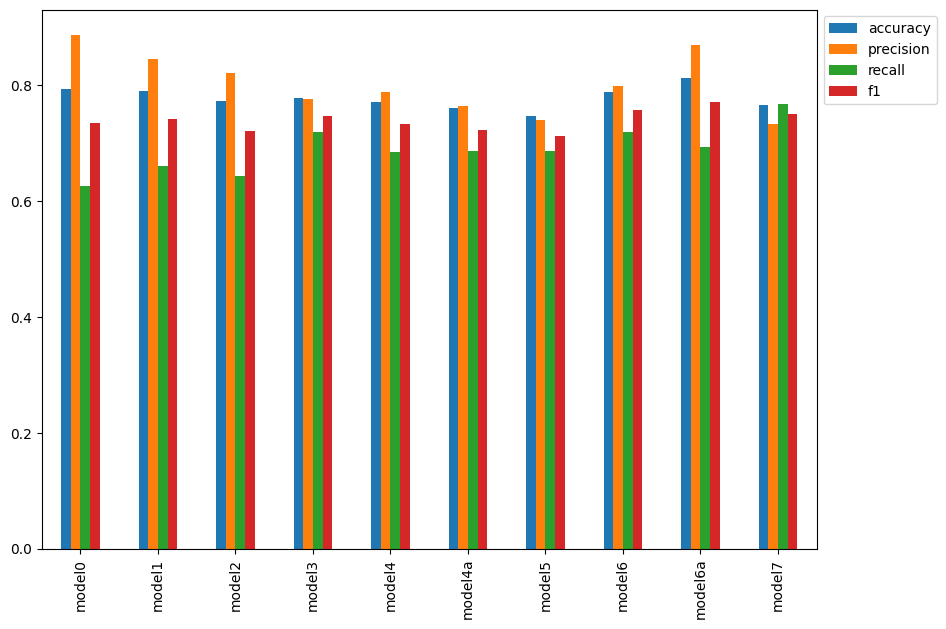

In [227]:
all_results.plot(kind="bar", figsize=(10,7)).legend(bbox_to_anchor=(1,1));

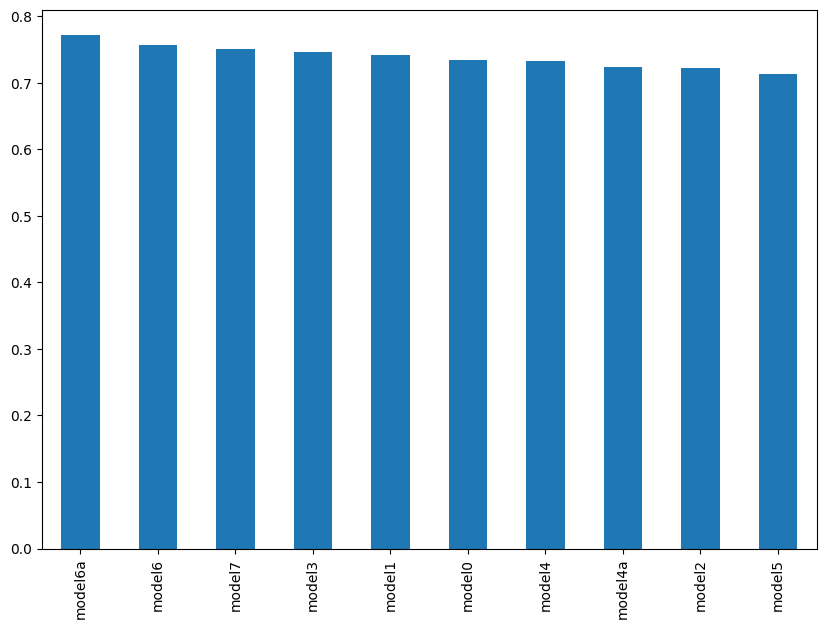

In [229]:
all_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10,7));

## Viewing the most wrong predictions

In [230]:
val_df= pd.DataFrame({"text": val_sentences,
                      "target": val_labels,
                      "preds": model6a_preds,
                      "probablity": tf.squeeze(model6a.predict(val_sentences))})

val_df

24/24 [==============================] - 0s 16ms/step


,text,target,preds,probablity
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.088608
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.749999
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.998303
3,@camilacabello97 Internally and externally scr...,1,0.0,0.290561
4,Radiation emergency #preparedness starts with ...,1,1.0,0.609761
...,...,...,...,...
757,That's the ultimate road to destruction,0,0.0,0.105412
758,@SetZorah dad why dont you claim me that mean ...,0,0.0,0.106870
759,FedEx will no longer transport bioterror patho...,0,1.0,0.744966
760,Crack in the path where I wiped out this morni...,0,0.0,0.421559


In [231]:
most_wrong=val_df[val_df["target"] != val_df["preds"]].sort_values("probablity", ascending=False)

In [232]:
most_wrong

,text,target,preds,probablity
628,@noah_anyname That's where the concentration c...,0,1.0,0.970676
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.940411
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.906824
303,Trafford Centre film fans angry after Odeon ci...,0,1.0,0.853746
741,#helpme what do I do? My friend has been ticke...,0,1.0,0.809343
...,...,...,...,...
681,'The way you move is like a full on rainstorm ...,1,0.0,0.032934
221,going to redo my nails and watch behind the sc...,1,0.0,0.032003
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.028369
233,I get to smoke my shit in peace,1,0.0,0.025531


In [233]:
len(most_wrong)

143

In [238]:
for row in most_wrong[:10].itertuples():
  _, txt, trg, pred,prob= row
  print(f"Text: {txt}")
  print(f"Target : {trg}  Prediction: {pred}")
  print(f"Probability: {prob}\n-----\n")

Text: @noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.
Target : 0  Prediction: 1.0
Probability: 0.9706757068634033
-----

Text: ? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying
Target : 0  Prediction: 1.0
Probability: 0.940411388874054
-----

Text: [55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES WITH MAGNE-TRACTION INSTRUCTIONS http://t.co/xEZBs3sq0y http://t.co/C2x0QoKGlY
Target : 0  Prediction: 1.0
Probability: 0.9068241119384766
-----

Text: Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm   http://t.co/6GLDwx71DA
Target : 0  Prediction: 1.0
Probability: 0.8537461757659912
-----

Text: #helpme what do I do? My friend has been ticketed by Police in Wayne County Michigan into never- sending poverty cycle. How do I help him?
Target : 0  Prediction: 1.0
Probability: 0.8093432784080505
-----

Text: Came across this fire video not mine..enjoy..Babes way of saying hi to me while he'

In [239]:
for row in most_wrong[-10:].itertuples():
  _, txt, trg, pred,prob= row
  print(f"Text: {txt}")
  print(f"Target : {trg}  Prediction: {pred}")
  print(f"Probability: {prob}\n-----\n")

Text: VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK
Target : 1  Prediction: 0.0
Probability: 0.04543314874172211
-----

Text: You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.
Target : 1  Prediction: 0.0
Probability: 0.04460834339261055
-----

Text: New post from @darkreading http://t.co/8eIJDXApnp New SMB Relay Attack Steals User Credentials Over Internet
Target : 1  Prediction: 0.0
Probability: 0.04409443214535713
-----

Text: Rand Paul's Debate Strategy 'demolish Some other bad ideas out there or point out maybe that there are some em... http://t.co/qzdqRBr4Lh
Target : 1  Prediction: 0.0
Probability: 0.04280434176325798
-----

Text: Ron &amp; Fez - Dave's High School Crush https://t.co/aN3W16c8F6 via @YouTube
Target : 1  Prediction: 0.0
Probability: 0.03546999767422676
-----

Text: 'The way you move is like a full on rainstorm and I'm 

## Making predictions on Test Dataset

In [240]:
test_sentences= test_df["text"].to_list()
test_sentences[:10]

['Just happened a terrible car crash',
 'Heard about #earthquake is different cities, stay safe everyone.',
 'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all',
 'Apocalypse lighting. #Spokane #wildfires',
 'Typhoon Soudelor kills 28 in China and Taiwan',
 "We're shaking...It's an earthquake",
 "They'd probably still show more life than Arsenal did yesterday, eh? EH?",
 'Hey! How are you?',
 'What a nice hat?',
 'Fuck off!']

In [242]:
test_samples= random.sample(test_sentences, 10)

for smp in test_samples:
  pred= model6a.predict([smp])
  print(f"Text: {smp}")
  print(f"Probablity: {pred}")
  print(f"Prediction: {tf.squeeze(tf.round(pred))}")

1/1 [==============================] - 0s 47ms/step
Text: Choking Hazard Prompts Recall Of Kraft Cheese Singles http://t.co/98nOsYzu58
Probablity: [[0.17240186]]
Prediction: 0.0
1/1 [==============================] - 0s 44ms/step
Text: It's a trap not a fucking game. U ain't trapping if u ain't trapped
Probablity: [[0.07150462]]
Prediction: 0.0
1/1 [==============================] - 0s 43ms/step
Text: Rescuers recover body of 37-year-old Calgary man from lake near Vulcan http://t.co/araUSJvsy9 http://t.co/U7ZWlk8THX
Probablity: [[0.9741388]]
Prediction: 1.0
1/1 [==============================] - 0s 43ms/step
Text: Wish I could buy a device that would electrocute me every time I went to eat something unhealthy....Eat so much shit.??????????
Probablity: [[0.1580817]]
Prediction: 0.0
1/1 [==============================] - 0s 44ms/step
Text: @bendwavy emergency chemical rinse
Probablity: [[0.60755736]]
Prediction: 1.0
1/1 [==============================] - 0s 47ms/step
Text: Been signed of

In [249]:
sent=input("Enter a Tweet:")
Test_custom_sentence([sent], model6a)

Enter a Tweet:There's an earthquake
1/1 [==============================] - 0s 28ms/step
pred: [[0.7236868]]
Sentence: ["There's an earthquake"]

Prediction: Disaster
